In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples= 1000, n_features=2, centers= 3)

In [4]:
X

array([[-8.01647681,  0.6318816 ],
       [ 2.57054516,  2.74717421],
       [-4.80422325,  1.07745964],
       ...,
       [-5.41488508,  4.88541712],
       [-5.97267971,  2.78206164],
       [ 2.99164777,  1.17472568]])

In [5]:
y

array([1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1,
       2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0,
       0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1,
       2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0,
       1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1,
       2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2,
       1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0,
       2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1,
       0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 1, 1, 1,

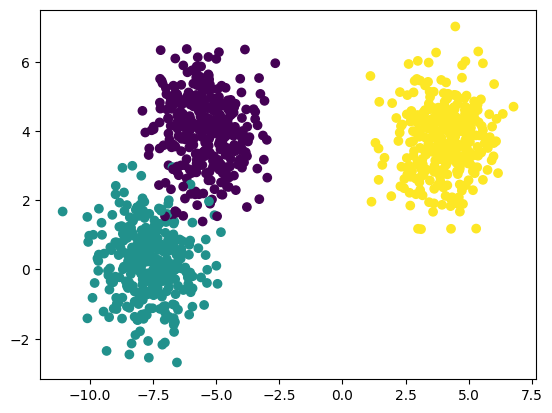

In [6]:
plt.scatter(X[:,0], X[:,1],c=y)

In [7]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [9]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

#Elbow method for k value
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[1339.9999999999989,
 616.6536921277151,
 184.2157696227658,
 147.74452821685006,
 110.18513702391415,
 84.45223652164961,
 73.54632453972654,
 65.24852376436493,
 61.85086336758733,
 54.93709711070025]

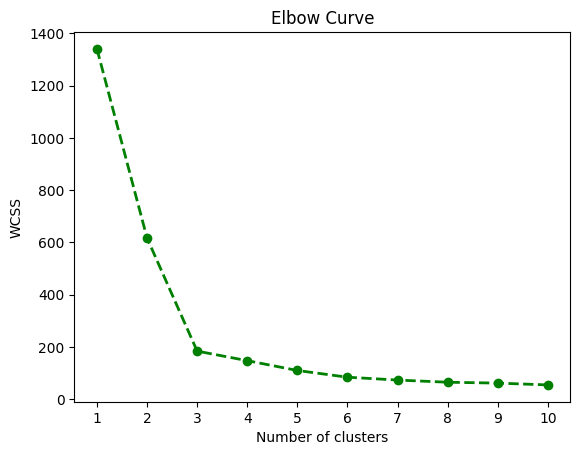

In [16]:
# plot wcss values Vs number of clusters i.e. Elbow Curve

plt.plot(range(1,11), wcss,color='green', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.xticks(range(1,11))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [18]:
kmeans.fit_predict(X_train_scaled)

array([0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0,
       2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2,
       2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2,
       0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 2,
       2, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1,
       1, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1,
       2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2,

In [19]:
y_pred = kmeans.predict(X_test_scaled)

In [20]:
y_pred

array([2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0,
       1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2,
       1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2,
       2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0,
       2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1,
       0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0,

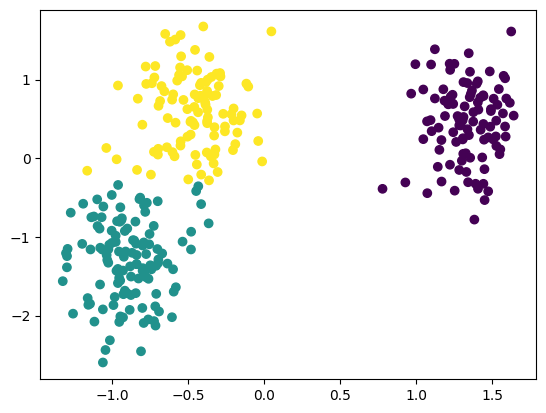

In [22]:
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1],c=y_pred)

In [23]:
# 2 techniques for validating the k value -  1. Knee locator
!pip install kneed
from kneed import KneeLocator

In [24]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [25]:
kl.elbow

3

In [26]:
# 2. Silhouette score
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [27]:
silhouette_coefficients

[0.5314008686533385,
 0.6568907378910709,
 0.563439389522853,
 0.49531973327446804,
 0.4357558987810535,
 0.42360215027192427,
 0.4147587957565827,
 0.38011120987970787,
 0.3767765906176498]

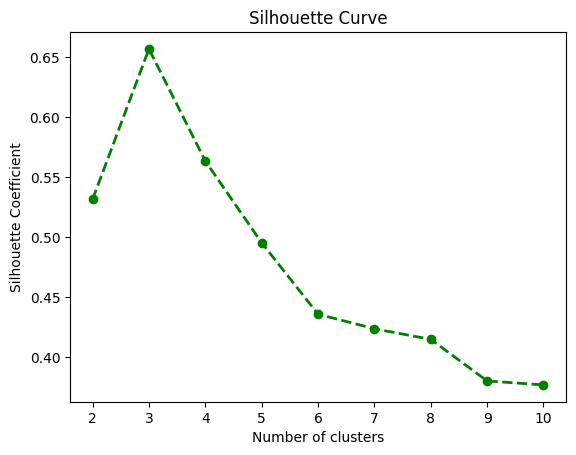

In [28]:
# plot score vs no of clusters

plt.plot(range(2,11), silhouette_coefficients,color='green', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.xticks(range(2,11))
plt.title('Silhouette Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()